In [1]:
import neilpy
import rasterio
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error as mse
from skimage.util import apply_parallel
from PIL import Image

In [3]:
# Load a sample dataset source from the NED around Mt. Washington.

with rasterio.open('../sample_data/sample_dem.tif') as src:
    Z = src.read(1)
    Zt = src.transform
    cellsize = np.abs(Zt[0])
    
# Take a small extract
Z = Z[0:800,600:1200]

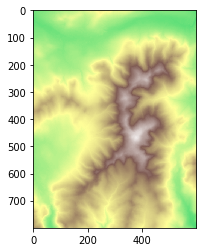

In [4]:
# Show a hysometric tint
plt.imshow(Z,cmap='terrain',vmin=-500,vmax=2000)
plt.show()

In [5]:
# There are two main routines in neilpy for calculating curvature (or concavity/convexity) on a raster:
# The Evans-based approach, and the ESRI approach
#
# With Evans:

C = [0,0,0,0,0]
C[0],C[1],C[2],C[3],C[4] = neilpy.evans_curvature(Z,cellsize)
labels = ['cross','plan','profile','long','tan']

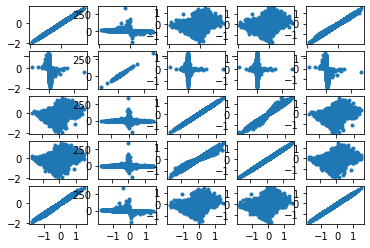

In [6]:
plt.figure()
counter=1
for i in range(5):
    for j in range(5):
        plt.subplot(5,5,counter)
        plt.plot(C[i].flatten(),C[j].flatten(),'.')
        counter = counter+1
plt.show()

Text(0.5, 1.0, 'tan')

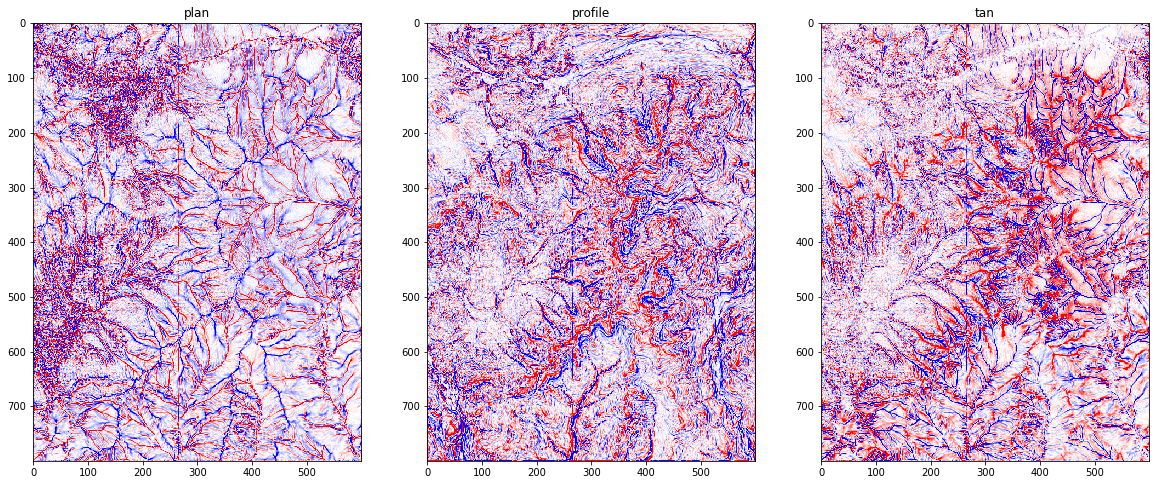

In [27]:
plt.figure(figsize=(20,20))
# Plan
lim = np.percentile(np.abs(C[1]),90)
plt.subplot(1,3,1)
plt.imshow(C[1],'bwr',vmin=-lim,vmax=lim)
plt.title('plan')

# profile
lim = np.percentile(np.abs(C[2]),90)
plt.subplot(1,3,2)
plt.imshow(C[2],'bwr',vmin=-lim,vmax=lim)
plt.title('profile')

# tan
lim = np.percentile(np.abs(C[4]),90)
plt.subplot(1,3,3)
plt.imshow(C[4],'bwr',vmin=-lim,vmax=lim)
plt.title('tan')
